In [204]:
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
from skimage.morphology import square, binary_closing, binary_opening
from skimage.util import img_as_ubyte
from skimage.io import imread, imshow, imsave


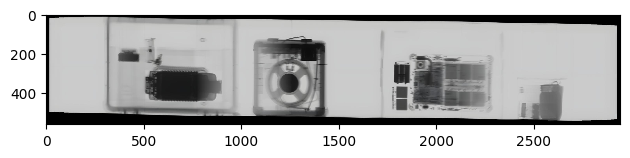

In [64]:
img = imread('xray.jpg')

imshow(img)

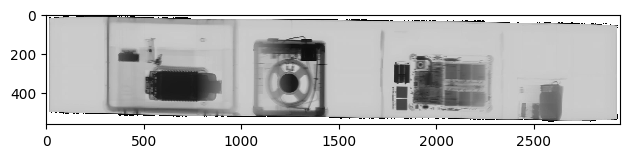

In [82]:
img_gray = rgb2gray(img)

img_gray[img_gray == 0] = 1
imshow(img_gray)

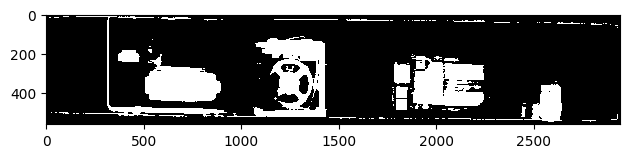

In [207]:

otsu = threshold_otsu(img_gray)
img_binaria = ~(img_gray > otsu)

teste = ~img_binaria

imshow(img_binaria)

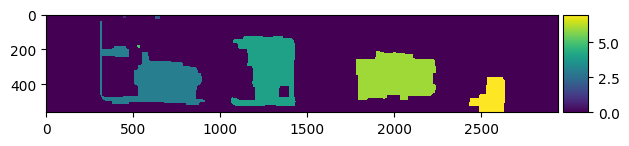

In [228]:
disk_op = square(9)
disk_clo = square(50)



img_opening = binary_opening(img_binaria, disk_op)

img_opening = binary_closing(img_opening, disk_clo)


rotulos = label(img_opening)
propriedades = regionprops(rotulos)

imshow(rotulos)

In [225]:
for i, prop in enumerate(propriedades, start=1):
    # Extrair as coordenadas da bounding box do objeto
    if prop.minor_axis_length > 60:
        minr, minc, maxr, maxc = prop.bbox
        objeto_segmentado = img_as_ubyte(img[minr:maxr, minc:maxc])
        
        # Salvar o objeto como uma imagem
        imsave(f"objeto_{i}.jpg", objeto_segmentado)